# PCA 
### PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables.

#### DATASET : AIRQUALITY DATA
#### AUTHOR: AVINASH BAGUL

In [1]:
import pycaret
import pandas as pd
import numpy as np

READING THE DATASET

In [2]:
df1 = pd.read_csv('iqr_benchmark.csv')
df = df1[df1['boxName']=='Bernem']
df = df.set_index('Time_stamp')
df = df.drop(df.iloc[:,0:1], axis = 1)
df = df.drop(df.iloc[:,-1:], axis = 1)

DATAFRAME

In [3]:
df

,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description
Time_stamp,,,,,,,,,,,
2018-12-31 18:30:53,139.63,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds
2018-12-31 18:35:01,136.43,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds
2018-12-31 18:39:09,112.67,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds
2018-12-31 18:43:17,46.87,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds
2018-12-31 18:47:24,38.30,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 18:11:12,3.93,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear
2020-02-28 18:14:31,4.33,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear
2020-02-28 18:21:01,3.93,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear


IMPORTING ANOMALY MODULE FROM PYCARET LIBRARY

In [4]:
from pycaret.anomaly import *
exp_ano=setup(df)


Setup Succesfully Completed!


,Description,Value
0,session_id,1929
1,Original Data,"(162173, 11)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,6
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(162173, 111)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


CREATING PCA MODEL

In [5]:
import time

start = time.time()

pca = create_model('pca')
pca_df = assign_model(pca)
pca_df

print('time: ', time.time()-start)

time:  5.416903018951416


In [6]:
pca

PCA(contamination=0.05, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=1929, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [7]:
pca_df

,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,Label,Score
Time_stamp,,,,,,,,,,,,,
2018-12-31 18:30:53,139.63,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,3.415756e+34
2018-12-31 18:35:01,136.43,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,3.352089e+34
2018-12-31 18:39:09,112.67,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,2.893840e+34
2018-12-31 18:43:17,46.87,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1.883970e+34
2018-12-31 18:47:24,38.30,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,0,1.804538e+34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 18:11:12,3.93,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,0,1.896018e+34
2020-02-28 18:14:31,4.33,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,0,1.895354e+34
2020-02-28 18:21:01,3.93,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,0,1.896018e+34


CONVERTING LABELS FROM (0,1) TO (NORMAL,ABNORMAL)

In [8]:
idf = pca_df['Label']
ll = []
for i in idf:
    if i == 0:
        ll.append('normal')
    else:
        ll.append('abnormal')

print(len(ll))

162173


A BENCHMARK DATAFRAME TO COMPARE THE PERFORMANCE OF PCA

In [9]:
ff = df1[df1['boxName']=='Bernem']
ff = ff.set_index('Time_stamp')
anml = pca_df[pca_df['Label']== 1]

## EVALUATION

CALCULATING ACCURACY, PRECISION, RECALL AND F1-SCORE

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

obt_label = ll
gold_label = ff['label']
testy = obt_label
yhat_classes = gold_label

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes, pos_label = 'abnormal')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes, pos_label = 'abnormal')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes, pos_label = 'abnormal')
print('F1 score: %f' % f1)
cm = confusion_matrix(testy, yhat_classes)
print('Confusion matrix: \n', cm)

Accuracy: 0.901093
Precision: 0.049733
Recall: 0.054014
F1 score: 0.051785
Confusion matrix: 
 [[   438   7671]
 [  8369 145695]]


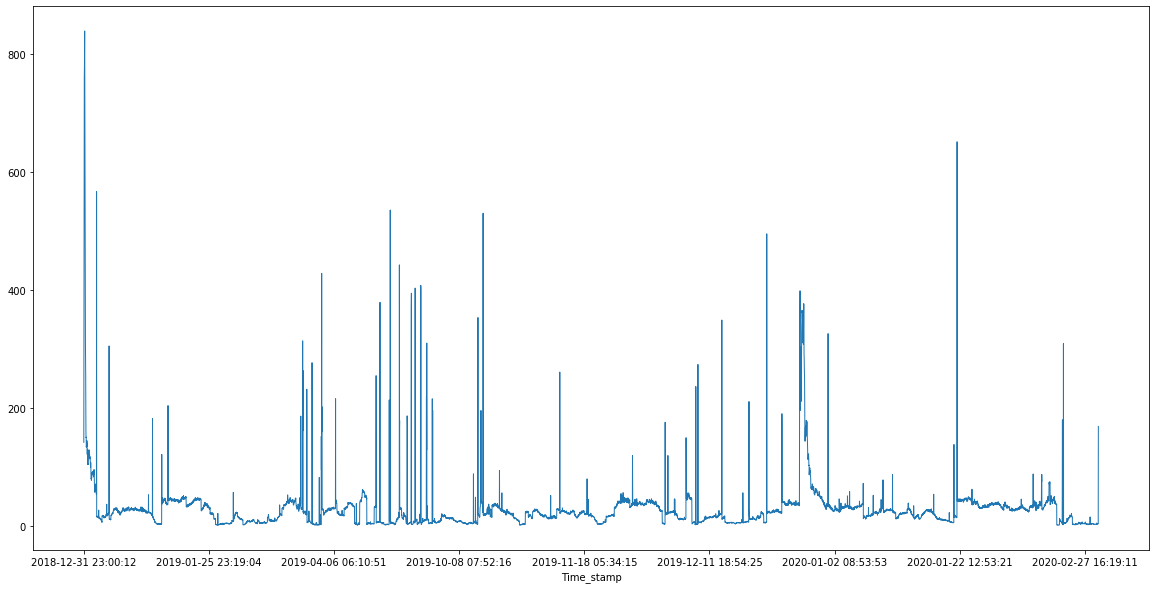

In [11]:
anml['PM 2.5'].plot(figsize=(20,10),linewidth=1)